In [2]:
# Initialisation of libraries/directories
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as Img
import os
from PIL import Image
import cv2
from sklearn.model_selection import train_test_split

from keras.models import *
from keras.layers import *

from keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

Using TensorFlow backend.


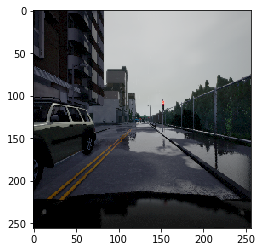

In [3]:
# Input data
img=cv2.imread('/jet/prs/workspace/Data/Raw_Data/RD/02_00_000.png') 
img=cv2.resize(img,dsize=(256,256),interpolation=cv2.INTER_NEAREST)[:,:,::-1]
plt.imshow(img)

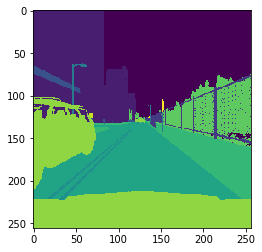

In [4]:
# Labelled data
img=cv2.imread('/jet/prs/workspace/Data/Mask_data/MD/02_00_000.png') 
img=cv2.resize(img,dsize=(256,256),interpolation=cv2.INTER_NEAREST)[:,:,2]
plt.imshow(img)

In [5]:
labels = [0, 1, 2, 3,4, 5, 6, 7, 8, 9, 10, 11, 12]
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [5]:
# files=len(list(os.walk('/jet/prs/workspace/Data/Raw_Data/RD/'))[0][2])
# files

In [6]:
# # Reading Raw Images
# files=list(os.walk('/jet/prs/workspace/Data/Raw_Data/RD/'))[0][2]
# input_img=np.empty([len(files),256,256,3])

# for i in range(len(files)):
#     img=cv2.imread('/jet/prs/workspace/Data/Raw_Data/RD/'+str(files[i]))
#     input_img[i,:,:,:]=cv2.resize(img,dsize=(256,256),interpolation=cv2.INTER_NEAREST)[:,:,::-1]

In [7]:
# input_img.shape

In [8]:
# mask_img = np.memmap(filename, dtype='float32', mode='w+', shape=(len(files),256*256,len(labels)))

In [9]:
# mask_img.shape

In [10]:
# # Reading Mask Images
# files=list(os.walk('/jet/prs/workspace/Data/Mask_data/MD/'))[0][2]
# mask_img=np.zeros([len(files),256*256,len(labels)])
# seg_img=np.empty([256,256,len(labels)])

# for i in range(len(files)):
#     img=cv2.imread('/jet/prs/workspace/Data/Mask_data/MD/'+str(files[i]))
#     img=cv2.resize(img,dsize=(256,256),interpolation=cv2.INTER_NEAREST)[:,:,2]
#     for c,l in enumerate(labels):
#         seg_img[: , : , c ] = ((img == l))*1
#     seg_img = seg_img.astype(np.float32)
#     mask_img[i,:,:] = np.reshape(seg_img, ( 256*256 , len(labels) ))        

In [11]:
# mask_img.reshape(len(files),256*256,12,1).shape

In [12]:
# # Provide the same seed and keyword arguments to the fit and flow methods
# seed = 1
# image_datagen.fit(input_img, augment=True, seed=seed)

In [13]:
# image_generator = image_datagen.flow_from_directory(
#     '/jet/prs/workspace/Data/Raw_Data/',
#     class_mode=None,
#     seed=seed)

In [14]:
# mask_datagen.fit(mask_img.reshape(len(files),256,256,1), augment=True, seed=seed)

In [15]:
# mask_generator = mask_datagen.flow_from_directory(
#     '/jet/prs/workspace/Data/Mask_data/',
#     class_mode=None,
#     seed=seed)

In [16]:
# # combine generators into one which yields image and masks
# train_generator = zip(image_generator, mask_generator)

In [17]:
# # we create two instances with the same arguments 
# data_gen_args = dict(featurewise_center=False,
#                      featurewise_std_normalization=False,
#                      rotation_range=90.,
#                      width_shift_range=0.1,
#                      height_shift_range=0.1,
#                      zoom_range=0.2) 
# image_datagen = ImageDataGenerator(**data_gen_args) 
# mask_datagen = ImageDataGenerator(**data_gen_args)

# # Provide the same seed and keyword arguments to the fit and flow methods seed = 1 
# image_datagen.fit(input_img, augment=True, seed=1) 
# mask_datagen.fit(mask_img.reshape(len(files),256,256,1), augment=True, seed=1)

# image_generator = image_datagen.flow_from_directory(
#     '/jet/prs/workspace/Data/Raw_Data/',
#     class_mode=None,
#     seed=1)

# mask_generator = mask_datagen.flow_from_directory(
#     '/jet/prs/workspace/Data/Mask_data/',
#     class_mode=None,
#     seed=1)

# # combine generators into one which yields image and masks 
# train_generator = zip(image_generator, mask_generator)

In [6]:
# we create two instances with the same arguments
data_gen_args = dict(featurewise_center=True,
                     featurewise_std_normalization=True,
                     rotation_range=90,
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                     zoom_range=0.2)
image_datagen = ImageDataGenerator(**data_gen_args)
# mask_datagen = ImageDataGenerator(**data_gen_args)

In [7]:
# My try Data Augmentation
import numpy as np
import cv2
import glob
import itertools
def generator(image_path, mask_path, batch_size, input_height, input_width, labels):
    
    assert image_path[-1] == '/'
    assert mask_path[-1] == '/'
    
    images = glob.glob( image_path + "*.png"  ) 
    images.sort()
    segmentations  = glob.glob( mask_path + "*.png"  )
    segmentations.sort()
    
    #no of images in both folders is same
    assert len( images ) == len(segmentations)
    
    #Files are in correspondance
    for im , seg in zip(images,segmentations):
        assert(  im.split('/')[-1].split(".")[0] ==  seg.split('/')[-1].split(".")[0] )
        
    zipped = itertools.cycle( zip(images,segmentations) )
    
    while True:
        X = []
        Y = []
        for _ in range(batch_size) :
            im , seg = next(zipped)
            
            img = cv2.imread(im)[:,:,::-1]
            #img = image_datagen.random_transform(img, seed=1)
            img = img.astype(np.float32)
            img = img/255.0
            img = cv2.resize(img, ( input_width , input_height ),interpolation=cv2.INTER_NEAREST)
            
            
            X.append(img)
            
            img1 = cv2.imread(seg)
            #img1 = image_datagen.random_transform(img1, seed=1)
            img1 = cv2.resize(img1, ( input_width , input_height ),interpolation=cv2.INTER_NEAREST)[:,:,2]
#             img1 = image_datagen.random_transform(img1, seed=1)
            
            seg_labels = np.zeros((  input_height , input_width  , len(labels)))
            
            
            
            
            for c,l in enumerate(labels):
                seg_labels[: , : , c ] = ((img1 == l))*1
            
            seg_labels = seg_labels.astype(np.float32)
#             seg_labels = np.reshape(seg_labels, ( input_height,input_width , len(labels) ))
               
            Y.append(seg_labels)
            

        yield np.array(X) , np.array(Y)
    

In [8]:
a = generator('/jet/prs/workspace/Data/Raw_Data/RD/' , '/jet/prs/workspace/Data/Mask_data/MD/', 5, 256,256,labels)

In [9]:
b,c =next(a)

In [10]:
import numpy as np
from keras.models import Sequential,Model
from keras.layers import Convolution2D, ZeroPadding2D, MaxPooling2D, Deconvolution2D, Cropping2D, Conv2DTranspose, UpSampling2D
from keras.layers import Input, Add, Dropout, Permute, add, concatenate, Reshape, Activation
from scipy.io import loadmat

from keras.preprocessing.image import ImageDataGenerator, load_img

In [43]:
def Unet (nClasses , input_width , input_height ): 

    inputs = Input(( input_width, input_height,3))
    conv1 = Convolution2D(64, (3, 3), activation='relu',padding='same', kernel_initializer="he_normal", name='block1_conv1')(inputs)
    conv1 = BatchNormalization()(conv1)
    conv1 = Convolution2D(64, (3, 3), activation='relu' ,padding='same',kernel_initializer="he_normal", name='block1_conv2')(conv1)
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    pool1 = Dropout(0.2)(pool1)

    conv2 = Convolution2D(128, (3, 3), activation='relu',padding='same',kernel_initializer="he_normal", name='block2_conv1')(pool1)
    conv2 = BatchNormalization()(conv2)
    conv2 = Convolution2D(128, (3, 3), activation='relu',padding='same', kernel_initializer="he_normal",name='block2_conv2')(conv2)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    pool2 = Dropout(0.2)(pool2)

    conv3 = Convolution2D(256, (3, 3), activation='relu',padding='same', kernel_initializer="he_normal",name='block3_conv1')(pool2)
    conv3 = BatchNormalization()(conv3)
    conv3 = Convolution2D(256, (3, 3), activation='relu',padding='same', kernel_initializer="he_normal",name='block3_conv2')(conv3)
    conv3 = BatchNormalization()(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    pool3 = Dropout(0.2)(pool3)

    conv4 = Convolution2D(512, (3, 3), activation='relu',padding='same',kernel_initializer="he_normal", name='block4_conv1')(pool3)
    conv4 = BatchNormalization()(conv4)
    conv4 = Convolution2D(512, (3, 3), activation='relu',padding='same', kernel_initializer="he_normal",name='block4_conv2')(conv4)
    conv4 = BatchNormalization()(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
    pool4 = Dropout(0.2)(pool4)

    conv5 = Convolution2D(1024, (3, 3), activation='relu',padding='same',kernel_initializer="he_normal", name='block5_conv1')(pool4)
    conv5 = BatchNormalization()(conv5)
    conv5 = Convolution2D(1024, (3, 3), activation='relu',padding='same',kernel_initializer="he_normal", name='block5_conv2')(conv5)
    conv5 = BatchNormalization()(conv5)

    #up4 = Conv2DTranspose( 512 , kernel_size=(4,4) ,  strides=(2,2) , padding='same', use_bias=False, data_format='channels_last')(conv5)
    up1 = (UpSampling2D( (2,2)))(conv5)
    upconv1 = Convolution2D(512, (3, 3), padding='same', name='upblock1_conv1', data_format='channels_last')(up1)
    add1 = ( concatenate([ conv4 ,upconv1],axis=3 )  )
    add1 = Dropout(0.2)(add1)
    conv6 = Convolution2D(512, (3, 3), activation='relu', padding='same',kernel_initializer="he_normal", name='upblock1_conv2')(add1)
    conv6 = BatchNormalization()(conv6)
    conv6 = Convolution2D(512, (3, 3), activation='relu', padding='same' ,kernel_initializer="he_normal",name='upblock1_conv3')(conv6)
    conv6 = BatchNormalization()(conv6)

    #up2 = Conv2DTranspose( 256 , kernel_size=(4,4) ,  strides=(2,2) , padding='same', use_bias=False, data_format='channels_last' )(conv6)
    up2 = (UpSampling2D( (2,2)))(conv6)
    upconv2 = Convolution2D(256, (3, 3), padding='same', name='upblock2_conv1')(up2)
    add2 = ( concatenate([ conv3 ,upconv2],axis=3 )  )
    add2 = Dropout(0.2)(add2)
    conv7 = Convolution2D(256, (3, 3), activation='relu', padding='same', kernel_initializer="he_normal",name='upblock2_conv2')(add2)
    conv7 = BatchNormalization()(conv7)
    conv7 = Convolution2D(256, (3, 3), activation='relu', padding='same' ,kernel_initializer="he_normal",name='upblock2_conv3')(conv7)
    conv7 = BatchNormalization()(conv7)

    up3 = (UpSampling2D( (2,2)))(conv7)
    upconv3 = Convolution2D(128, (3, 3), padding='same', name='upblock3_conv1')(up3)
    add3 = ( concatenate([ conv2 ,upconv3],axis=3 )  )
    add3 = Dropout(0.2)(add3)
    conv8 = Convolution2D(128, (3, 3), activation='relu', padding='same', kernel_initializer="he_normal",name='upblock3_conv2')(add3)
    conv8 = BatchNormalization()(conv8)
    conv8 = Convolution2D(128, (3, 3), activation='relu', padding='same' ,kernel_initializer="he_normal",name='upblock3_conv3')(conv8)
    conv8 = BatchNormalization()(conv8)

    up4 = (UpSampling2D( (2,2)))(conv8)
    upconv4 = Convolution2D(64, (3, 3), padding='same', name='upblock4_conv1')(up4)
    add4 = ( concatenate([ conv1 ,upconv4],axis=3 )  )
    add4 = Dropout(0.2)(add4)
    conv9 = Convolution2D(64, (3, 3), activation='relu', padding='same', kernel_initializer="he_normal",name='upblock4_conv2')(add4)
    conv9 = BatchNormalization()(conv9)
    conv9 = Convolution2D(64, (3, 3), activation='relu', padding='same' ,kernel_initializer="he_normal",name='upblock4_conv3')(conv9)
    conv9 = BatchNormalization()(conv9)

    o =  Convolution2D( nClasses , (3, 3) , padding='same')( conv9 )
#     o_shape = Model(inputs , o ).output_shape
#     outputHeight = o_shape[1]
#     outputWidth = o_shape[2]

#     o = (Reshape((   outputHeight*outputWidth, nClasses   )))(o)
    o = (Activation('softmax'))(o)
    model = Model( inputs , o )
    
    return model


In [44]:
from keras.optimizers import Adam, RMSprop 
from keras.metrics import categorical_crossentropy
from keras.metrics import binary_crossentropy

model = Unet(13 ,256, 256 ) 

#model_dice = dice_loss(smooth=1e-5, thresh=0.5)

model.compile(loss='categorical_crossentropy', optimizer= Adam(lr=0.0001) , metrics=['accuracy'] )

# Check with Binary Cross entropy
# model.compile(loss='binary_crossentropy', optimizer= Adam(lr=0.0001) , metrics=['accuracy'] )

In [45]:
b,c=next(a)

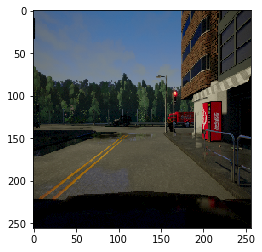

In [46]:
plt.imshow(b[0])

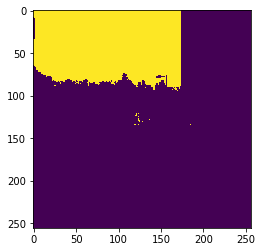

In [47]:
plt.imshow(c[0][:,:,0])

In [48]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 256, 256, 64) 1792        input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_37 (BatchNo (None, 256, 256, 64) 256         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 256, 256, 64) 36928       batch_normalization_37[0][0]     
__________________________________________________________________________________________________
batch_norm

In [49]:
history = model.fit_generator( a , 500  , epochs=10 )
model.save("model_unet_categoricalloss.h5")

Epoch 1/10
500/500 [==============================] - 137s 275ms/step - loss: 0.5417 - acc: 0.8422
Epoch 2/10
500/500 [==============================] - 130s 259ms/step - loss: 0.3807 - acc: 0.8874
Epoch 3/10
500/500 [==============================] - 130s 259ms/step - loss: 0.3519 - acc: 0.8935
Epoch 4/10
500/500 [==============================] - 130s 259ms/step - loss: 0.3215 - acc: 0.9033
Epoch 5/10
500/500 [==============================] - 129s 258ms/step - loss: 0.3085 - acc: 0.9068
Epoch 6/10
500/500 [==============================] - 129s 258ms/step - loss: 0.2834 - acc: 0.9140
Epoch 7/10
500/500 [==============================] - 129s 258ms/step - loss: 0.2743 - acc: 0.9170
Epoch 8/10
500/500 [==============================] - 129s 258ms/step - loss: 0.2590 - acc: 0.9205
Epoch 9/10
500/500 [==============================] - 129s 258ms/step - loss: 0.2528 - acc: 0.9230
Epoch 10/10
500/500 [==============================] - 129s 258ms/step - loss: 0.2375 - acc: 0.9266


## Intersection over Union checking for Categorical Cross-entropy loss

In [102]:
# model.save_weights("model_unet.h5")

In [50]:
b,c=next(a)

In [51]:
pr=model.predict(b)[0]
pr = pr.argmax( axis=2 )

In [52]:
pr

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ..., 
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10]])

In [53]:
np.unique(pr)

array([ 0,  1,  2,  3,  7,  8,  9, 10])

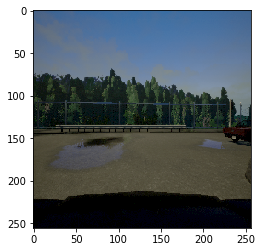

In [54]:
plt.imshow(b[0])

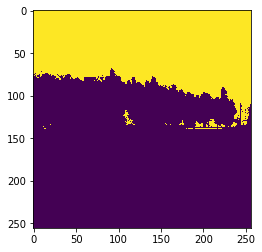

In [55]:
plt.imshow(c[0][:,:,0])

In [56]:
np.unique(pr)

array([ 0,  1,  2,  3,  7,  8,  9, 10])

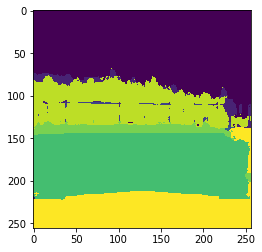

In [57]:
plt.imshow(pr)

In [58]:
c.shape

(5, 256, 256, 13)

In [59]:
np.unique(c[4][:,:,0])

array([ 0.,  1.], dtype=float32)

In [60]:
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [61]:
seg_img=np.zeros((256,256,13))
# pr = pr.argmax( axis=2 )
IoU=0
num=0
den=0
img_np=0
d=0

for i,j in enumerate(labels):
    seg_img[:,:,i][pr==j]=1
    num=np.where(np.multiply(seg_img[:,:,i],c[img_np][:,:,i])==1)[0].shape[0]
    den=np.where((c[img_np][:,:,i])==1)[0].shape[0]+np.where(seg_img[:,:,i]==1)[0].shape[0]
    
    if den!=0:
        IoU=IoU+(num/den)
        d=d+1
        
mean_iou=IoU/d
mean_iou

0.23184364820149522

# Comparing Categorical Cross-entropy loss with Binary Cross-entropy loss

In [62]:
from keras.optimizers import Adam, RMSprop 
from keras.metrics import categorical_crossentropy
from keras.metrics import binary_crossentropy

model = Unet(13 ,256, 256 ) 

#model_dice = dice_loss(smooth=1e-5, thresh=0.5)

# model.compile(loss='categorical_crossentropy', optimizer= Adam(lr=0.0001) , metrics=['accuracy'] )

# Check with Binary Cross entropy
model.compile(loss='binary_crossentropy', optimizer= Adam(lr=0.0001) , metrics=['accuracy'] )

In [63]:
b,c=next(a)

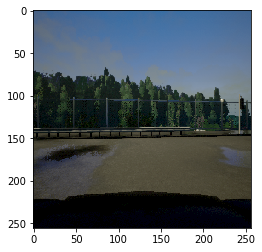

In [64]:
plt.imshow(b[0])

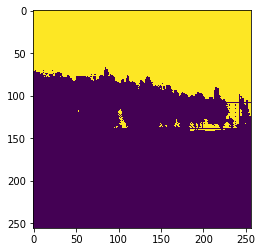

In [65]:
plt.imshow(c[0][:,:,0])

In [66]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 256, 256, 64) 1792        input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_55 (BatchNo (None, 256, 256, 64) 256         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 256, 256, 64) 36928       batch_normalization_55[0][0]     
__________________________________________________________________________________________________
batch_norm

In [ ]:
history = model.fit_generator( a , 500  , epochs=10 )
model.save("model_unet_bomaryloss.h5")

Epoch 1/10
500/500 [==============================] - 139s 278ms/step - loss: 0.0654 - acc: 0.9784
Epoch 2/10
500/500 [==============================] - 130s 261ms/step - loss: 0.0476 - acc: 0.9841
Epoch 3/10
500/500 [==============================] - 130s 261ms/step - loss: 0.0447 - acc: 0.9847
Epoch 4/10
500/500 [==============================] - 130s 260ms/step - loss: 0.0400 - acc: 0.9866
Epoch 5/10
500/500 [==============================] - 130s 260ms/step - loss: 0.0387 - acc: 0.9868
Epoch 6/10
500/500 [==============================] - 130s 261ms/step - loss: 0.0353 - acc: 0.9881
Epoch 7/10
500/500 [==============================] - 130s 261ms/step - loss: 0.0347 - acc: 0.9883
Epoch 8/10
500/500 [==============================] - 130s 261ms/step - loss: 0.0317 - acc: 0.9893
Epoch 9/10
500/500 [==============================] - 130s 261ms/step - loss: 0.0322 - acc: 0.9890
Epoch 10/10
338/500 [===================>..........] - ETA: 42s - loss: 0.0299 - acc: 0.9898

## Intersection over Union checking for Binary Cross-entropy loss

In [102]:
# model.save_weights("model_unet.h5")

In [ ]:
b,c=next(a)

In [ ]:
pr=model.predict(b)[0]
pr = pr.argmax( axis=2 )

In [ ]:
pr

In [ ]:
np.unique(pr)

In [ ]:
plt.imshow(b[0])

In [ ]:
plt.imshow(c[0][:,:,0])

In [ ]:
np.unique(pr)

In [ ]:
plt.imshow(pr)

In [ ]:
c.shape

In [ ]:
np.unique(c[4][:,:,0])

In [ ]:
labels

In [ ]:
seg_img=np.zeros((256,256,13))
# pr = pr.argmax( axis=2 )
IoU=0
num=0
den=0
img_np=0
d=0

for i,j in enumerate(labels):
    seg_img[:,:,i][pr==j]=1
    num=np.where(np.multiply(seg_img[:,:,i],c[img_np][:,:,i])==1)[0].shape[0]
    den=np.where((c[img_np][:,:,i])==1)[0].shape[0]+np.where(seg_img[:,:,i]==1)[0].shape[0]
    
    if den!=0:
        IoU=IoU+(num/den)
        d=d+1
        
mean_iou=IoU/d
mean_iou

# End of the main work

In [215]:
from keras import backend as K
K.tf.metrics.mean_iou(
    c[4][:,:,:],
    pr[:,:,:],
    12,
    weights=None,
    metrics_collections=None,
    updates_collections=None,
    name=None)

AttributeError: 'numpy.ndarray' object has no attribute 'get_shape'

In [222]:
seg_img=np.zeros((256,256,12))
pr = pr.argmax( axis=2 )

for i,j in enumerate(labels):
    seg_img[:,:,i][pr==j]=1

In [267]:
from keras import backend as K
import tensorflow as tf
from keras.callbacks import TensorBoard

def Mean_IOU( y_true , y_pred):
    
    y_true=tf.convert_to_tensor(
    y_true,
    dtype=None,
    name=None,
    preferred_dtype=None)
    
    y_pred=tf.convert_to_tensor(
    y_pred,
    dtype=None,
    name=None,
    preferred_dtype=None)
    
    nb_classes = K.int_shape(y_pred)[-1]
    iou = []
    true_pixels = K.argmax(y_true, axis=-1)
    pred_pixels = K.argmax(y_pred, axis=-1)
    void_labels = K.equal(K.sum(y_true, axis=-1), 0)
    for i in range(0, nb_classes): # exclude first label (background) and last label (void)
        true_labels = K.equal(true_pixels, i) & ~void_labels
        pred_labels = K.equal(pred_pixels, i) & ~void_labels
        inter = tf.to_int32(true_labels & pred_labels)
        union = tf.to_int32(true_labels | pred_labels)
        legal_batches = K.sum(tf.to_int32(true_labels), axis=1)>0
        ious = K.sum(inter, axis=1)/K.sum(union, axis=1)
        iou.append(K.mean(tf.gather(ious, indices=tf.where(legal_batches)))) # returns average IoU of the same objects
    iou = tf.stack(iou)
    legal_labels = ~tf.debugging.is_nan(iou)
    iou = tf.gather(iou, indices=tf.where(legal_labels))
    return K.mean(iou)

In [269]:
a = Mean_IOU(pr,c[4])

In [220]:
c[4][:,:,:]

array([[[ 1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 1.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 1.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 1.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       ..., 
       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0., 

In [144]:
np.unique(pr[:,:])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [190]:
(np.multiply(seg_img[:,:,6],c[0][:,:,6])==1)[0].shape[0]

256

In [175]:
den

(19688, 20709)

In [170]:
np.unique(np.multiply(seg_img[:,:,i],c[0][:,:,i]))

array([ 0.])

In [135]:
np.where(np.multiply(pr[:,:,0],c[0][:,:,0])==1)

(array([], dtype=int64), array([], dtype=int64))

In [133]:
np.where(pr[:,:,0]==1)[0].shape 

(19688,)

In [134]:
np.where(c[0][:,:,0]==1)[0].shape

(19688,)

In [109]:
seg_labels = np.zeros((256,256,len(labels)))
IoU=0

for c,l in enumerate(labels):
    num = np.where(np.multiply(pr[:,:,i],seg_labels[:,:,i])==1).shape
    den = np.where(pr[:,:,i]==1).shape+np.where(seg_labels[:,:,i]==1).shape
    IoU = IoU + num/den   
mean_iou=IoU/len(labels)

NameError: name 'i' is not defined

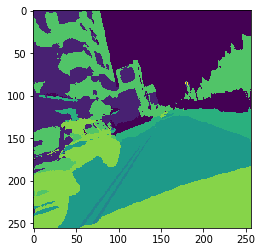

In [107]:
plt.imshow(pr)

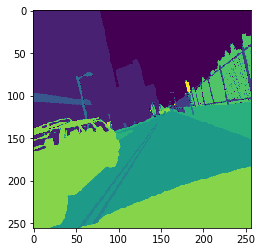

In [108]:
plt.imshow(c[0].argmax( axis=2 ))